In [10]:
from seaborn import heatmap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
font = np.array([
    [0x04, 0x04, 0x02, 0x00, 0x00, 0x00, 0x00],  # 0x60, `
    [0x00, 0x0e, 0x01, 0x0d, 0x13, 0x13, 0x0d],  # 0x61, a
    [0x10, 0x10, 0x10, 0x1c, 0x12, 0x12, 0x1c],  # 0x62, b
    [0x00, 0x00, 0x00, 0x0e, 0x10, 0x10, 0x0e],  # 0x63, c
    [0x01, 0x01, 0x01, 0x07, 0x09, 0x09, 0x07],  # 0x64, d
    [0x00, 0x00, 0x0e, 0x11, 0x1f, 0x10, 0x0f],  # 0x65, e
    [0x06, 0x09, 0x08, 0x1c, 0x08, 0x08, 0x08],  # 0x66, f
    [0x0e, 0x11, 0x13, 0x0d, 0x01, 0x01, 0x0e],  # 0x67, g
    [0x10, 0x10, 0x10, 0x16, 0x19, 0x11, 0x11],  # 0x68, h
    [0x00, 0x04, 0x00, 0x0c, 0x04, 0x04, 0x0e],  # 0x69, i
    [0x02, 0x00, 0x06, 0x02, 0x02, 0x12, 0x0c],  # 0x6a, j
    [0x10, 0x10, 0x12, 0x14, 0x18, 0x14, 0x12],  # 0x6b, k
    [0x0c, 0x04, 0x04, 0x04, 0x04, 0x04, 0x04],  # 0x6c, l
    [0x00, 0x00, 0x0a, 0x15, 0x15, 0x11, 0x11],  # 0x6d, m
    [0x00, 0x00, 0x16, 0x19, 0x11, 0x11, 0x11],  # 0x6e, n
    [0x00, 0x00, 0x0e, 0x11, 0x11, 0x11, 0x0e],  # 0x6f, o
    [0x00, 0x1c, 0x12, 0x12, 0x1c, 0x10, 0x10],  # 0x70, p
    [0x00, 0x07, 0x09, 0x09, 0x07, 0x01, 0x01],  # 0x71, q
    [0x00, 0x00, 0x16, 0x19, 0x10, 0x10, 0x10],  # 0x72, r
    [0x00, 0x00, 0x0f, 0x10, 0x0e, 0x01, 0x1e],  # 0x73, s
    [0x08, 0x08, 0x1c, 0x08, 0x08, 0x09, 0x06],  # 0x74, t
    [0x00, 0x00, 0x11, 0x11, 0x11, 0x13, 0x0d],  # 0x75, u
    [0x00, 0x00, 0x11, 0x11, 0x11, 0x0a, 0x04],  # 0x76, v
    [0x00, 0x00, 0x11, 0x11, 0x15, 0x15, 0x0a],  # 0x77, w
    [0x00, 0x00, 0x11, 0x0a, 0x04, 0x0a, 0x11],  # 0x78, x
    [0x00, 0x11, 0x11, 0x0f, 0x01, 0x11, 0x0e],  # 0x79, y
    [0x00, 0x00, 0x1f, 0x02, 0x04, 0x08, 0x1f],  # 0x7a, z
    [0x06, 0x08, 0x08, 0x10, 0x08, 0x08, 0x06],  # 0x7b, {
    [0x04, 0x04, 0x04, 0x00, 0x04, 0x04, 0x04],  # 0x7c, |
    [0x0c, 0x02, 0x02, 0x01, 0x02, 0x02, 0x0c],  # 0x7d, }
    [0x08, 0x15, 0x02, 0x00, 0x00, 0x00, 0x00],  # 0x7e, ~
    [0x1f, 0x1f, 0x1f, 0x1f, 0x1f, 0x1f, 0x1f]   # 0x7f, DEL
])

In [12]:
char_example = np.copy(font[1])
char_example.resize(7, 1)
print(char_example)

[[ 0]
 [14]
 [ 1]
 [13]
 [19]
 [19]
 [13]]


In [13]:
bin_array = np.zeros(5, dtype=int)
for i in range(0,5):
    bin_array[4-i] = char_example[0] & 1
    char_example[0] >>= 1
bin_array.resize(1, 5)


In [14]:
only_first_row      = np.zeros((7, 5), dtype=int)
only_first_row[0]   = bin_array * 4
only_first_row[1:]  = np.ones((6, 5)) * 3

In [15]:
def to_bin_array(encoded_caracter):
    bin_array = np.zeros((7, 5), dtype=int)
    for row in range(0, 7):
        current_row = encoded_caracter[row]
        for col in range(0, 5):
            bin_array[row][4-col] = current_row & 1
            current_row >>= 1
    return bin_array

In [16]:
print(to_bin_array(font[1]))

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 1]
 [0 1 1 0 1]
 [1 0 0 1 1]
 [1 0 0 1 1]
 [0 1 1 0 1]]


In [17]:
def plot_binary_matrix(matrix):
    num_rows, num_columns = matrix.shape

    fig, ax = plt.subplots(figsize=(num_columns, num_rows))
    ax.axis('off')

    colors = [['black' if val == 1 else 'white' for val in row] for row in matrix]

    table = ax.table(cellText=None, cellColours=colors, cellLoc='center', loc='center')
    table.scale(1, 1.5)
    table.auto_set_font_size(False)
    table.set_fontsize(14)

    plt.show()

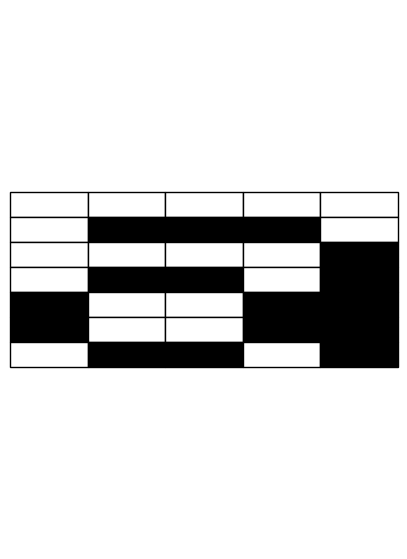

In [18]:
plot_binary_matrix(to_bin_array(font[1]))

In [19]:
def plot_letters_patterns(letters_patterns):
    num_letters = len(letters_patterns)
    num_rows = (num_letters + 4) // 5  # Calcular el número de filas necesario
    fig, axs = plt.subplots(num_rows, 6, figsize=(10, num_rows * 1.5))
    axs = axs.flat

    for i, ax in enumerate(axs):
        if i < num_letters:
            matrix = letters_patterns[i]

            # Crear el gráfico de la matriz con divisiones entre celdas
            num_rows, num_columns = matrix.shape
            colors = [['violet' if val == 1 else 'white' for val in row] for row in matrix]

            if num_columns > 0:
                ax.axis('off')
                table = ax.table(cellText=None, cellColours=colors, cellLoc='center', loc='center')
                table.scale(1, 1.5)
                table.auto_set_font_size(False)
                table.set_fontsize(14)
                ax.axis('off')

     
           

    # Ajustar los espacios entre las subtramas y mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [20]:
data = []
letters_patterns = []

for letter in font:
    aux = to_bin_array(letter)
    data.append(np.concatenate(aux))
    letters_patterns.append(aux)
print(letters_patterns)

[array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]]), array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [0, 1, 1, 0, 1]]), array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [1, 1, 1, 0, 0]]), array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0]]), array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 0, 1, 1, 1]]), array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0],
     

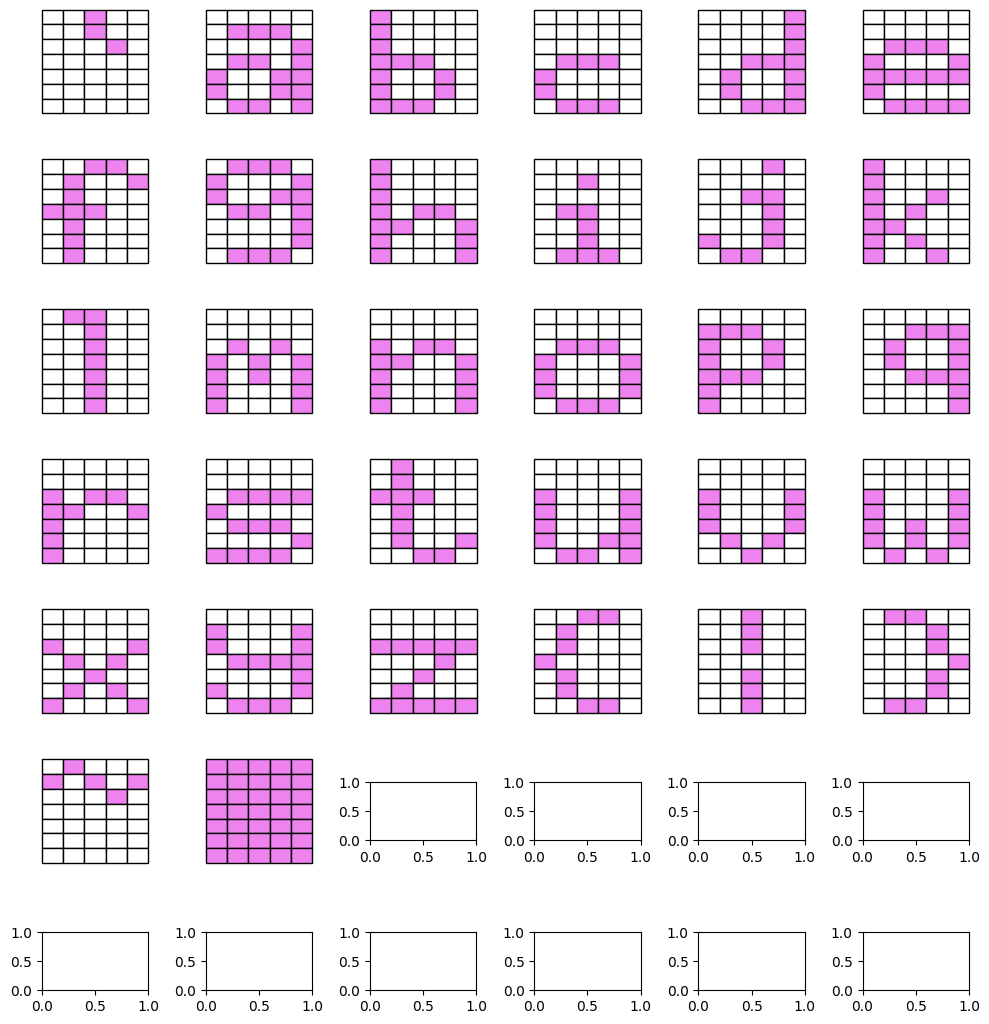

In [21]:
plot_letters_patterns(letters_patterns)